### Importing Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingRegressor
from matplotlib.lines import Line2D

### Importing the dataset

In [26]:
df = pd.read_csv('../../../Datasets/RQ1/react_metrics.csv')
df.head(10)

,Unnamed: 0,version,release_date,timestamp,sqale_debt_ratio,vulnerabilities,security_rating,sqale_rating,complexity,cognitive_complexity,ncloc
0,0,v0.3.0,2013-05-29,1369856771,0.5,10,4.0,1.0,37898,20042,246223
1,1,v0.3.3,2013-06-20,1371766458,3.6,0,1.0,1.0,4830,7246,22301
2,2,v0.4.0,2013-07-17,1374086011,3.4,0,1.0,1.0,5436,7593,25895
3,3,v0.4.1,2013-07-26,1374878032,3.4,0,1.0,1.0,5427,7576,25921
4,4,v0.4.2,2013-12-17,1387346417,3.4,0,1.0,1.0,5432,7576,25981
5,5,v0.10.0,2014-03-21,1395434042,3.4,0,1.0,1.0,5432,7576,25981
6,6,v0.10.0-rc1,2014-03-18,1395205772,2.3,0,1.0,1.0,4401,2384,28597
7,7,v0.11.0,2014-07-17,1405630026,2.3,0,1.0,1.0,4401,2384,28597
8,8,v0.11.0-rc1,2014-07-12,1405219845,2.3,0,1.0,1.0,4770,2516,31389
9,9,v0.11.1,2014-07-25,1406312952,2.3,0,1.0,1.0,4781,2531,31450


### Information of the Dataframe 

In [27]:
df.describe()

,Unnamed: 0,timestamp,sqale_debt_ratio,vulnerabilities,security_rating,sqale_rating,complexity,cognitive_complexity,ncloc
count,45.000000,4.500000e+01,45.000000,45.000000,45.000000,45.0,45.000000,45.000000,45.000000
mean,22.000000,1.497652e+09,1.602222,4.177778,2.800000,1.0,15241.577778,9182.688889,95984.666667
std,13.133926,8.547130e+07,1.224650,5.335511,1.486301,0.0,12942.267480,10841.932218,79402.770251
min,0.000000,1.369857e+09,0.200000,0.000000,1.000000,1.0,339.000000,196.000000,3551.000000
25%,11.000000,1.425412e+09,0.300000,0.000000,1.000000,1.0,5436.000000,4591.000000,31450.000000
50%,22.000000,1.501802e+09,1.400000,1.000000,4.000000,1.0,12535.000000,7100.000000,81822.000000
75%,33.000000,1.570127e+09,2.300000,10.000000,4.000000,1.0,24326.000000,10147.000000,164813.000000
max,44.000000,1.654733e+09,3.900000,14.000000,4.000000,1.0,66139.000000,73420.000000,328950.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            45 non-null     int64  
 1   version               45 non-null     object 
 2   release_date          45 non-null     object 
 3   timestamp             45 non-null     int64  
 4   sqale_debt_ratio      45 non-null     float64
 5   vulnerabilities       45 non-null     int64  
 6   security_rating       45 non-null     float64
 7   sqale_rating          45 non-null     float64
 8   complexity            45 non-null     int64  
 9   cognitive_complexity  45 non-null     int64  
 10  ncloc                 45 non-null     int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 4.0+ KB


### Updating Version Names

In [29]:
df['version'] = df['version'].str.replace('v', '')

In [30]:
df['version'] = 'v' + df['version']
df['version']

0                            v0.3.0
1                            v0.3.3
2                            v0.4.0
3                            v0.4.1
4                            v0.4.2
5                           v0.10.0
6                       v0.10.0-rc1
7                           v0.11.0
8                       v0.11.0-rc1
9                           v0.11.1
10                          v0.13.0
11                      v0.13.0-rc1
12                      v0.13.0-rc2
13                          v0.13.1
14                          v0.13.2
15                          v15.3.1
16                          v0.14.6
17                          v0.14.7
18                          v0.14.8
19                          v15.0.0
20                          v15.3.2
21                   v16.0.0-beta.1
22                   v16.0.0-beta.3
23                   v16.0.0-beta.4
24                   v16.0.0-beta.5
25                 v0.0.0-88ada9819
26                          v16.3.0
27                  v16.3.0-

### Sorting accoriding to the timeframe

In [31]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [32]:
df.head(20)

,version,release_date,timestamp,sqale_debt_ratio,vulnerabilities,security_rating,sqale_rating,complexity,cognitive_complexity,ncloc
0,v0.3.0,2013-05-29,1369856771,0.5,10,4.0,1.0,37898,20042,246223
1,v0.3.3,2013-06-20,1371766458,3.6,0,1.0,1.0,4830,7246,22301
2,v0.4.0,2013-07-17,1374086011,3.4,0,1.0,1.0,5436,7593,25895
3,v0.4.1,2013-07-26,1374878032,3.4,0,1.0,1.0,5427,7576,25921
4,v0.4.2,2013-12-17,1387346417,3.4,0,1.0,1.0,5432,7576,25981
5,v0.10.0,2014-03-21,1395434042,3.4,0,1.0,1.0,5432,7576,25981
6,v0.10.0-rc1,2014-03-18,1395205772,2.3,0,1.0,1.0,4401,2384,28597
7,v0.11.0,2014-07-17,1405630026,2.3,0,1.0,1.0,4401,2384,28597
8,v0.11.0-rc1,2014-07-12,1405219845,2.3,0,1.0,1.0,4770,2516,31389
9,v0.11.1,2014-07-25,1406312952,2.3,0,1.0,1.0,4781,2531,31450


## Correlation

In [33]:
df_cor = df.drop(['version', 'release_date', 'timestamp','sqale_rating'], axis=1)

### Pearson Correlation

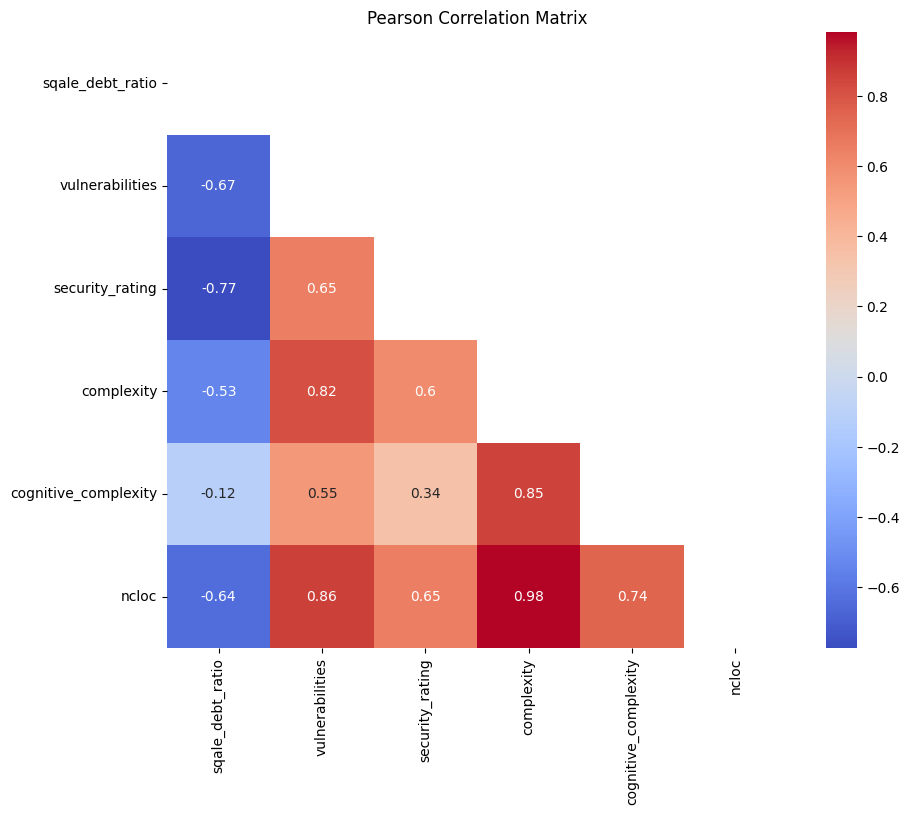

In [34]:
correlation_matrix = df_cor.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title('Pearson Correlation Matrix')
plt.show()

### Spearman Correlation

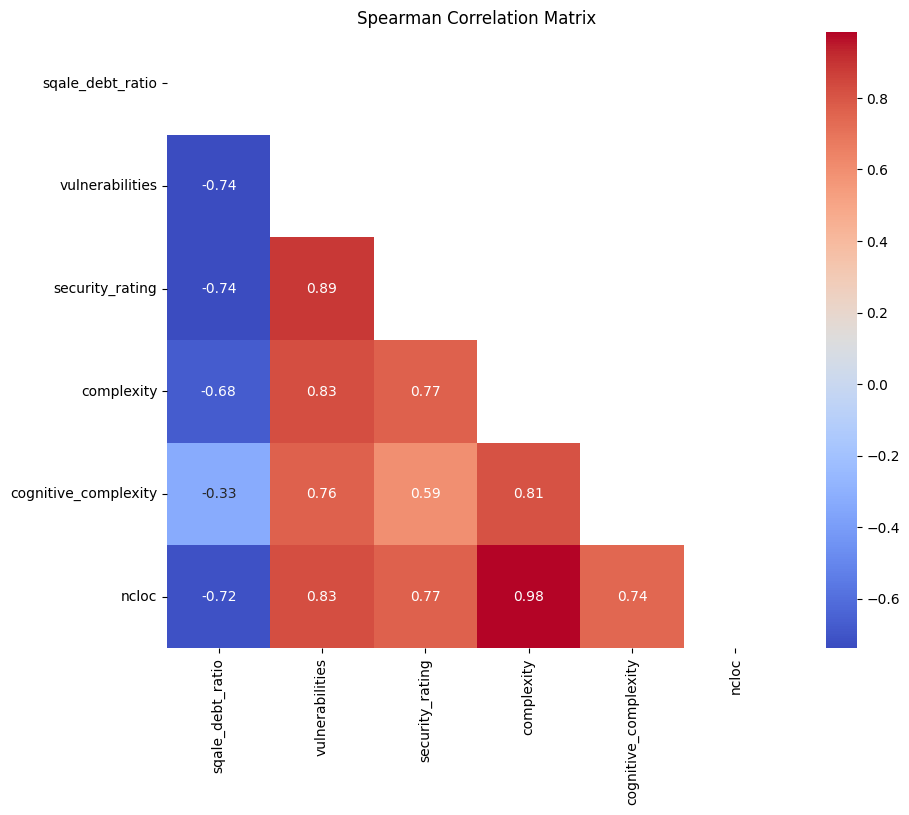

In [35]:
correlation_matrix = df_cor.corr(method ='spearman')

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title('Spearman Correlation Matrix')
plt.show()

In [36]:
df['timestamp']

0     1369856771
1     1371766458
2     1374086011
3     1374878032
4     1387346417
5     1395434042
6     1395205772
7     1405630026
8     1405219845
9     1406312952
10    1426023929
11    1424640373
12    1425411961
13    1426549830
14    1429396128
15    1473448327
16    1452122793
17    1454009306
18    1459266565
19    1460056070
20    1489715923
21    1501098931
22    1501801528
23    1502208497
24    1502213125
25    1543442205
26    1522354032
27    1517605294
28    1518460901
29    1521059200
30    1553874819
31    1571695735
32    1569450387
33    1569693057
34    1570127072
35    1602703969
36    1585592704
37    1583955503
38    1584492974
39    1585592704
40    1609775180
41    1616443295
42    1648570053
43    1651004928
44    1654732789
Name: timestamp, dtype: int64

### Checking for the categorical and numerical columns

In [37]:
df_cor.columns

Index(['sqale_debt_ratio', 'vulnerabilities', 'security_rating', 'complexity',
       'cognitive_complexity', 'ncloc'],
      dtype='object')

In [38]:
columns = ['sqale_debt_ratio', 'vulnerabilities', 'security_rating', 'sqale_rating','complexity',
       'cognitive_complexity', 'ncloc']
for col in columns: 
    print(f'Count for {col}')   
    print(df[col].value_counts())
    print('------------------------')

Count for sqale_debt_ratio
sqale_debt_ratio
0.3    11
2.3     9
0.5     4
3.4     4
1.4     4
2.7     3
0.4     3
3.9     2
1.9     2
3.6     1
0.2     1
2.2     1
Name: count, dtype: int64
------------------------
Count for vulnerabilities
vulnerabilities
0     18
12    10
1      9
10     3
2      3
9      1
14     1
Name: count, dtype: int64
------------------------
Count for security_rating
security_rating
4.0    27
1.0    18
Name: count, dtype: int64
------------------------
Count for sqale_rating
sqale_rating
1.0    45
Name: count, dtype: int64
------------------------
Count for complexity
complexity
26018    3
24326    2
12963    2
5432     2
4401     2
11737    2
8237     2
4335     2
24515    1
12651    1
339      1
37898    1
24325    1
13117    1
66139    1
25470    1
31563    1
28150    1
36863    1
12535    1
13058    1
13140    1
13125    1
4830     1
12872    1
8241     1
5689     1
5675     1
5653     1
5598     1
5664     1
4781     1
4770     1
5427     1
5436     1
37

### Categorical Columns Visulaization

C:\Users\sadik\AppData\Local\Temp\ipykernel_22988\3498626547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=col, data=df, ax=ax, palette='Set2')
C:\Users\sadik\AppData\Local\Temp\ipykernel_22988\3498626547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=col, data=df, ax=ax, palette='Set2')
C:\Users\sadik\AppData\Local\Temp\ipykernel_22988\3498626547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=col, data=df, ax=ax, palette='Set2')
C:\Users\sadik\AppData\Local\Temp\ipykernel_22988

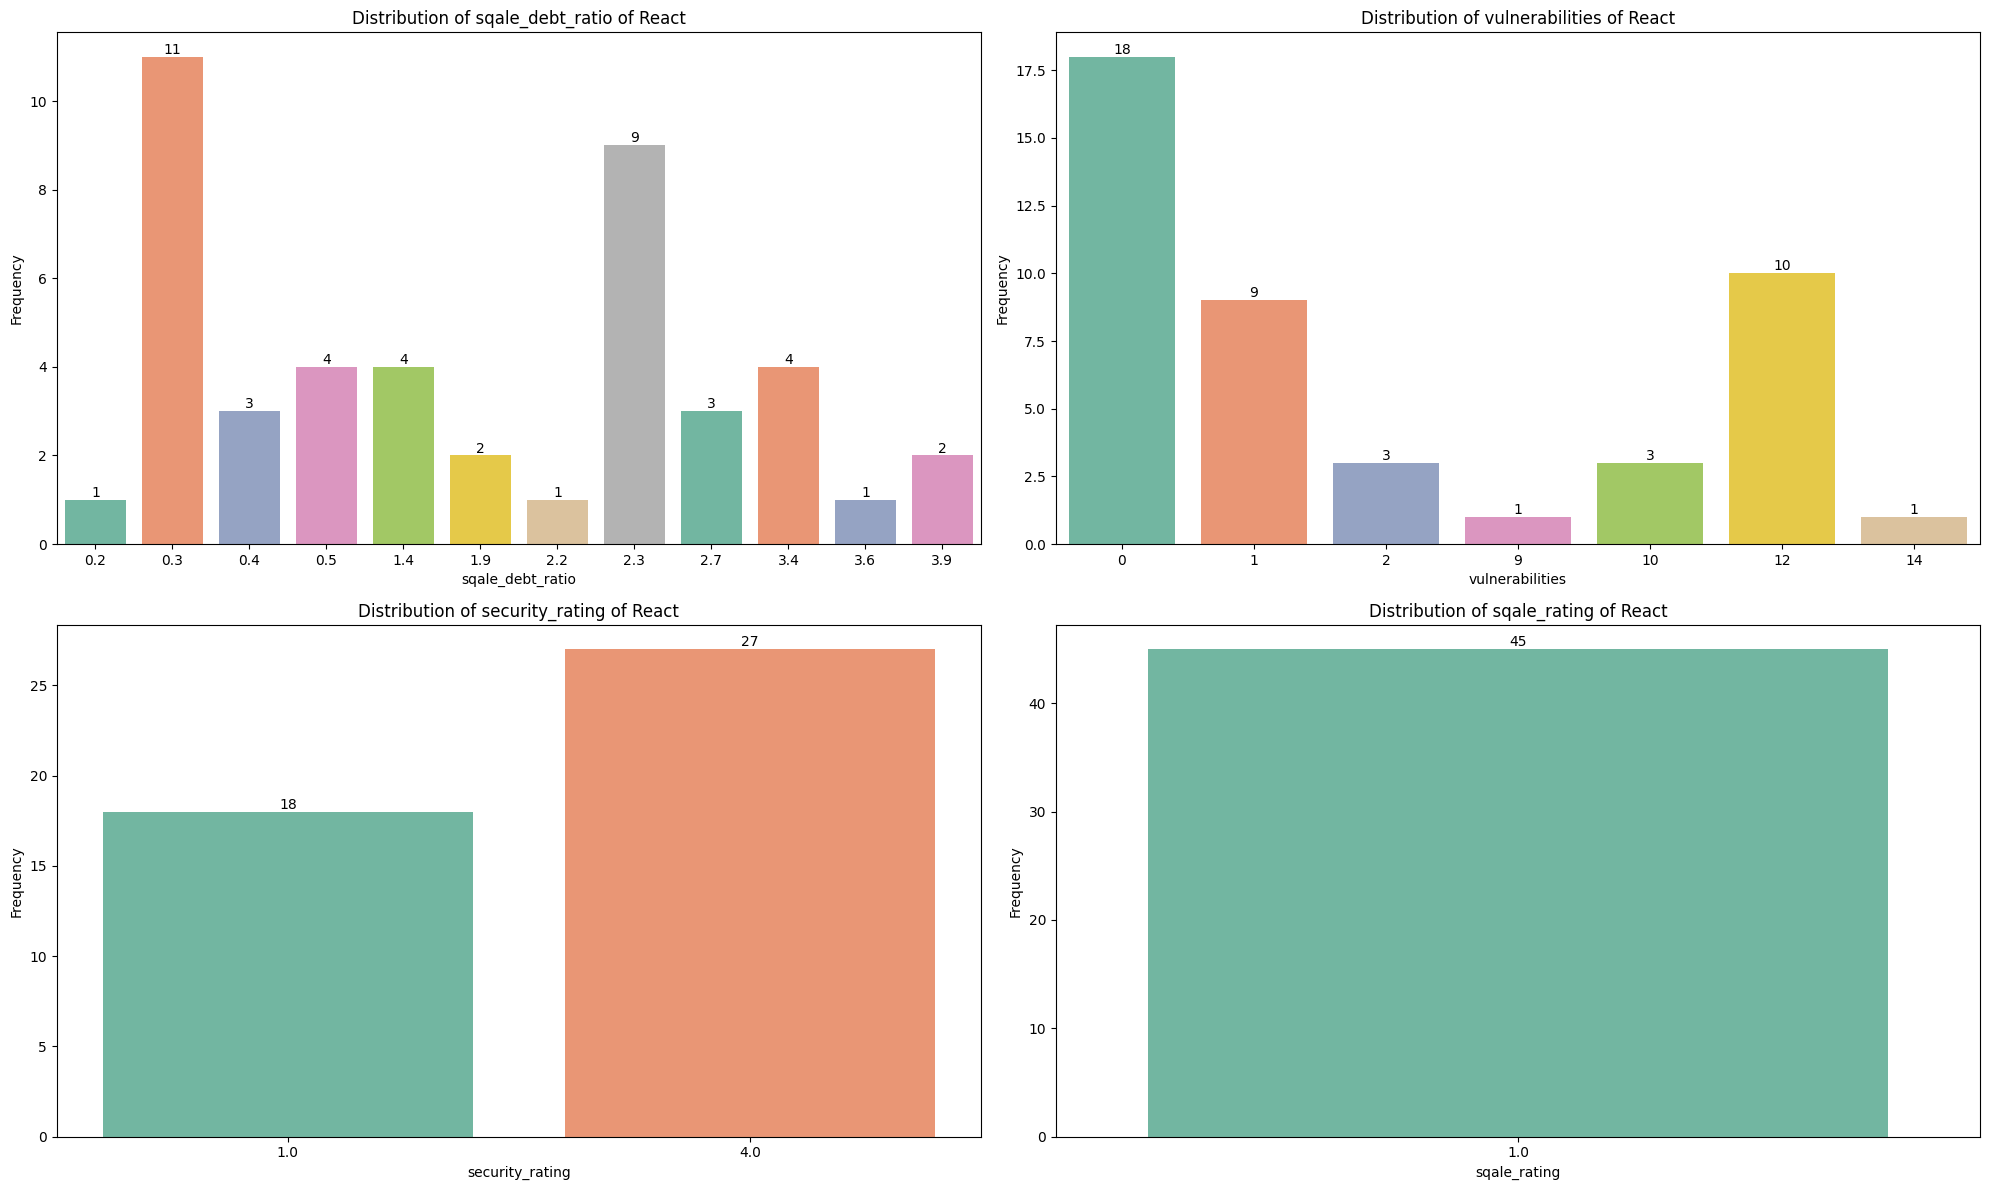

In [39]:
categorical_columns = ['sqale_debt_ratio', 'vulnerabilities', 'security_rating', 'sqale_rating']
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
for ax, col in zip(axs.flatten(), categorical_columns):
    countplot = sns.countplot(x=col, data=df, ax=ax, palette='Set2')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {col} of React')
    for p in countplot.patches:
        countplot.annotate(format(p.get_height(), '.0f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 5), 
                           textcoords = 'offset points')
plt.tight_layout()
plt.show()

### Numerical Columns Visualization

#### Using Histogram

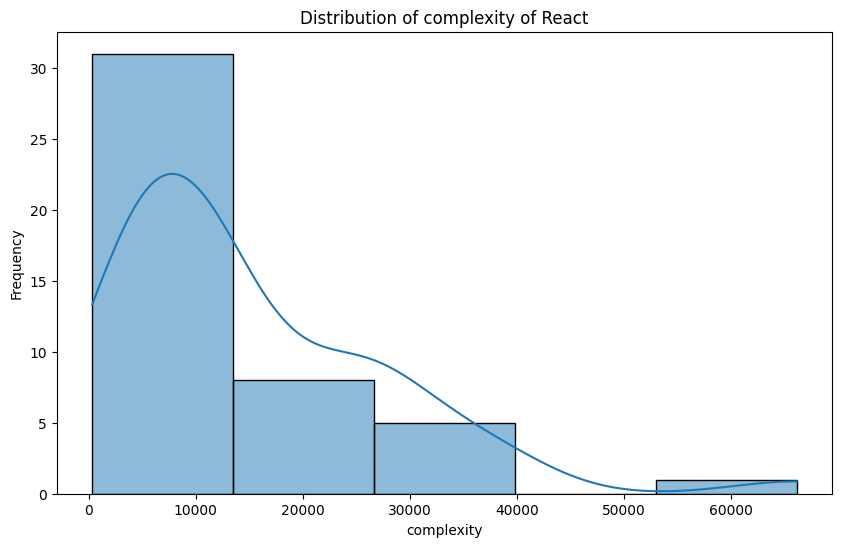

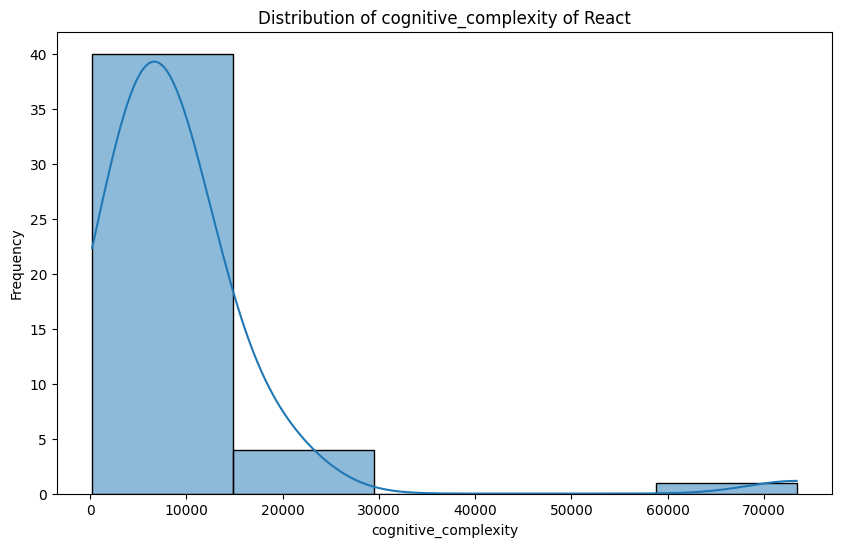

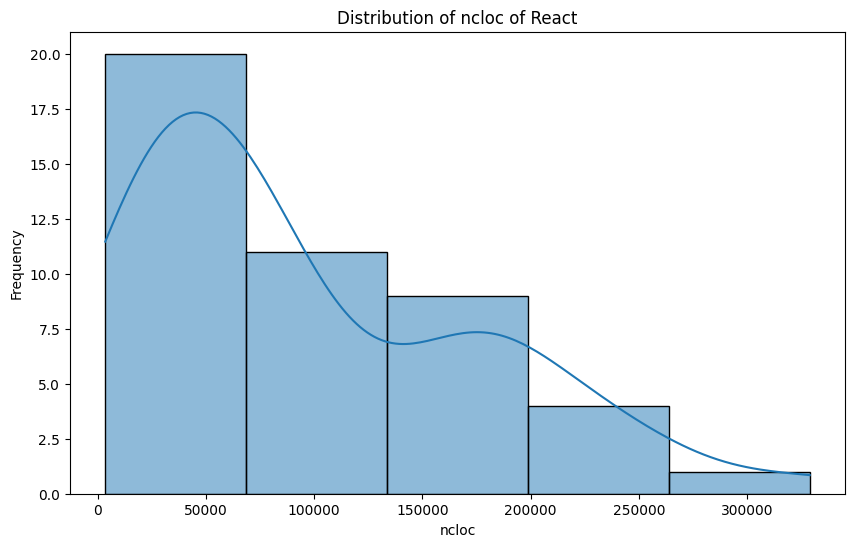

In [40]:
numerical_columns = ['complexity', 'cognitive_complexity', 'ncloc']

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    histplot = sns.histplot(df[col], bins=5, kde=True)
    plt.title(f'Distribution of {col} of React')
    histplot.set_ylabel('Frequency')
    plt.show()

#### Using Boxplot

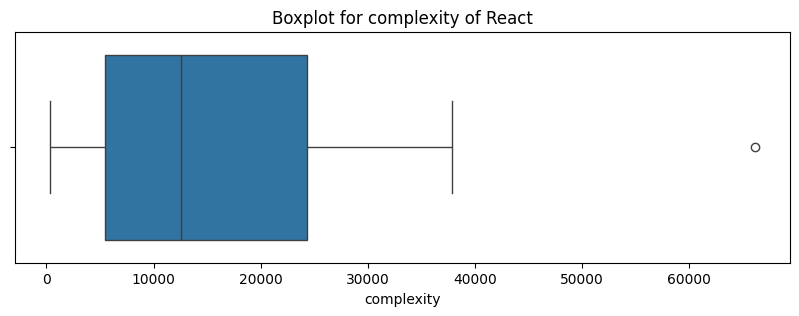

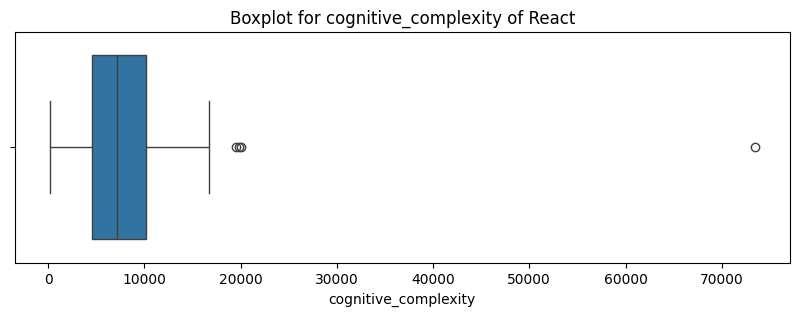

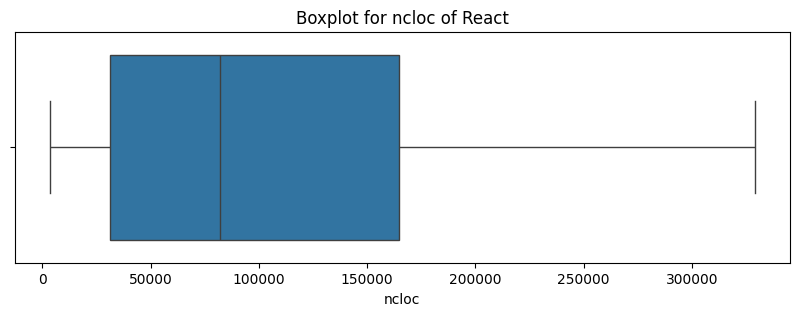

In [41]:
for col in numerical_columns:
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col} of React')
    plt.show()

### Visualization using Control Chart

In [42]:
columns_for_controlChart = ['sqale_debt_ratio', 'vulnerabilities', 'security_rating', 'sqale_rating', 'complexity', 'cognitive_complexity', 'ncloc']

C:\Users\sadik\AppData\Local\Temp\ipykernel_22988\2741007347.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
C:\Users\sadik\AppData\Local\Temp\ipykernel_22988\2741007347.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
C:\Users\sadik\AppData\Local\Temp\ipykernel_22988\2741007347.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
C:\Users\sadik\AppData\Local\Temp\ipykernel_22988\2741007347.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels

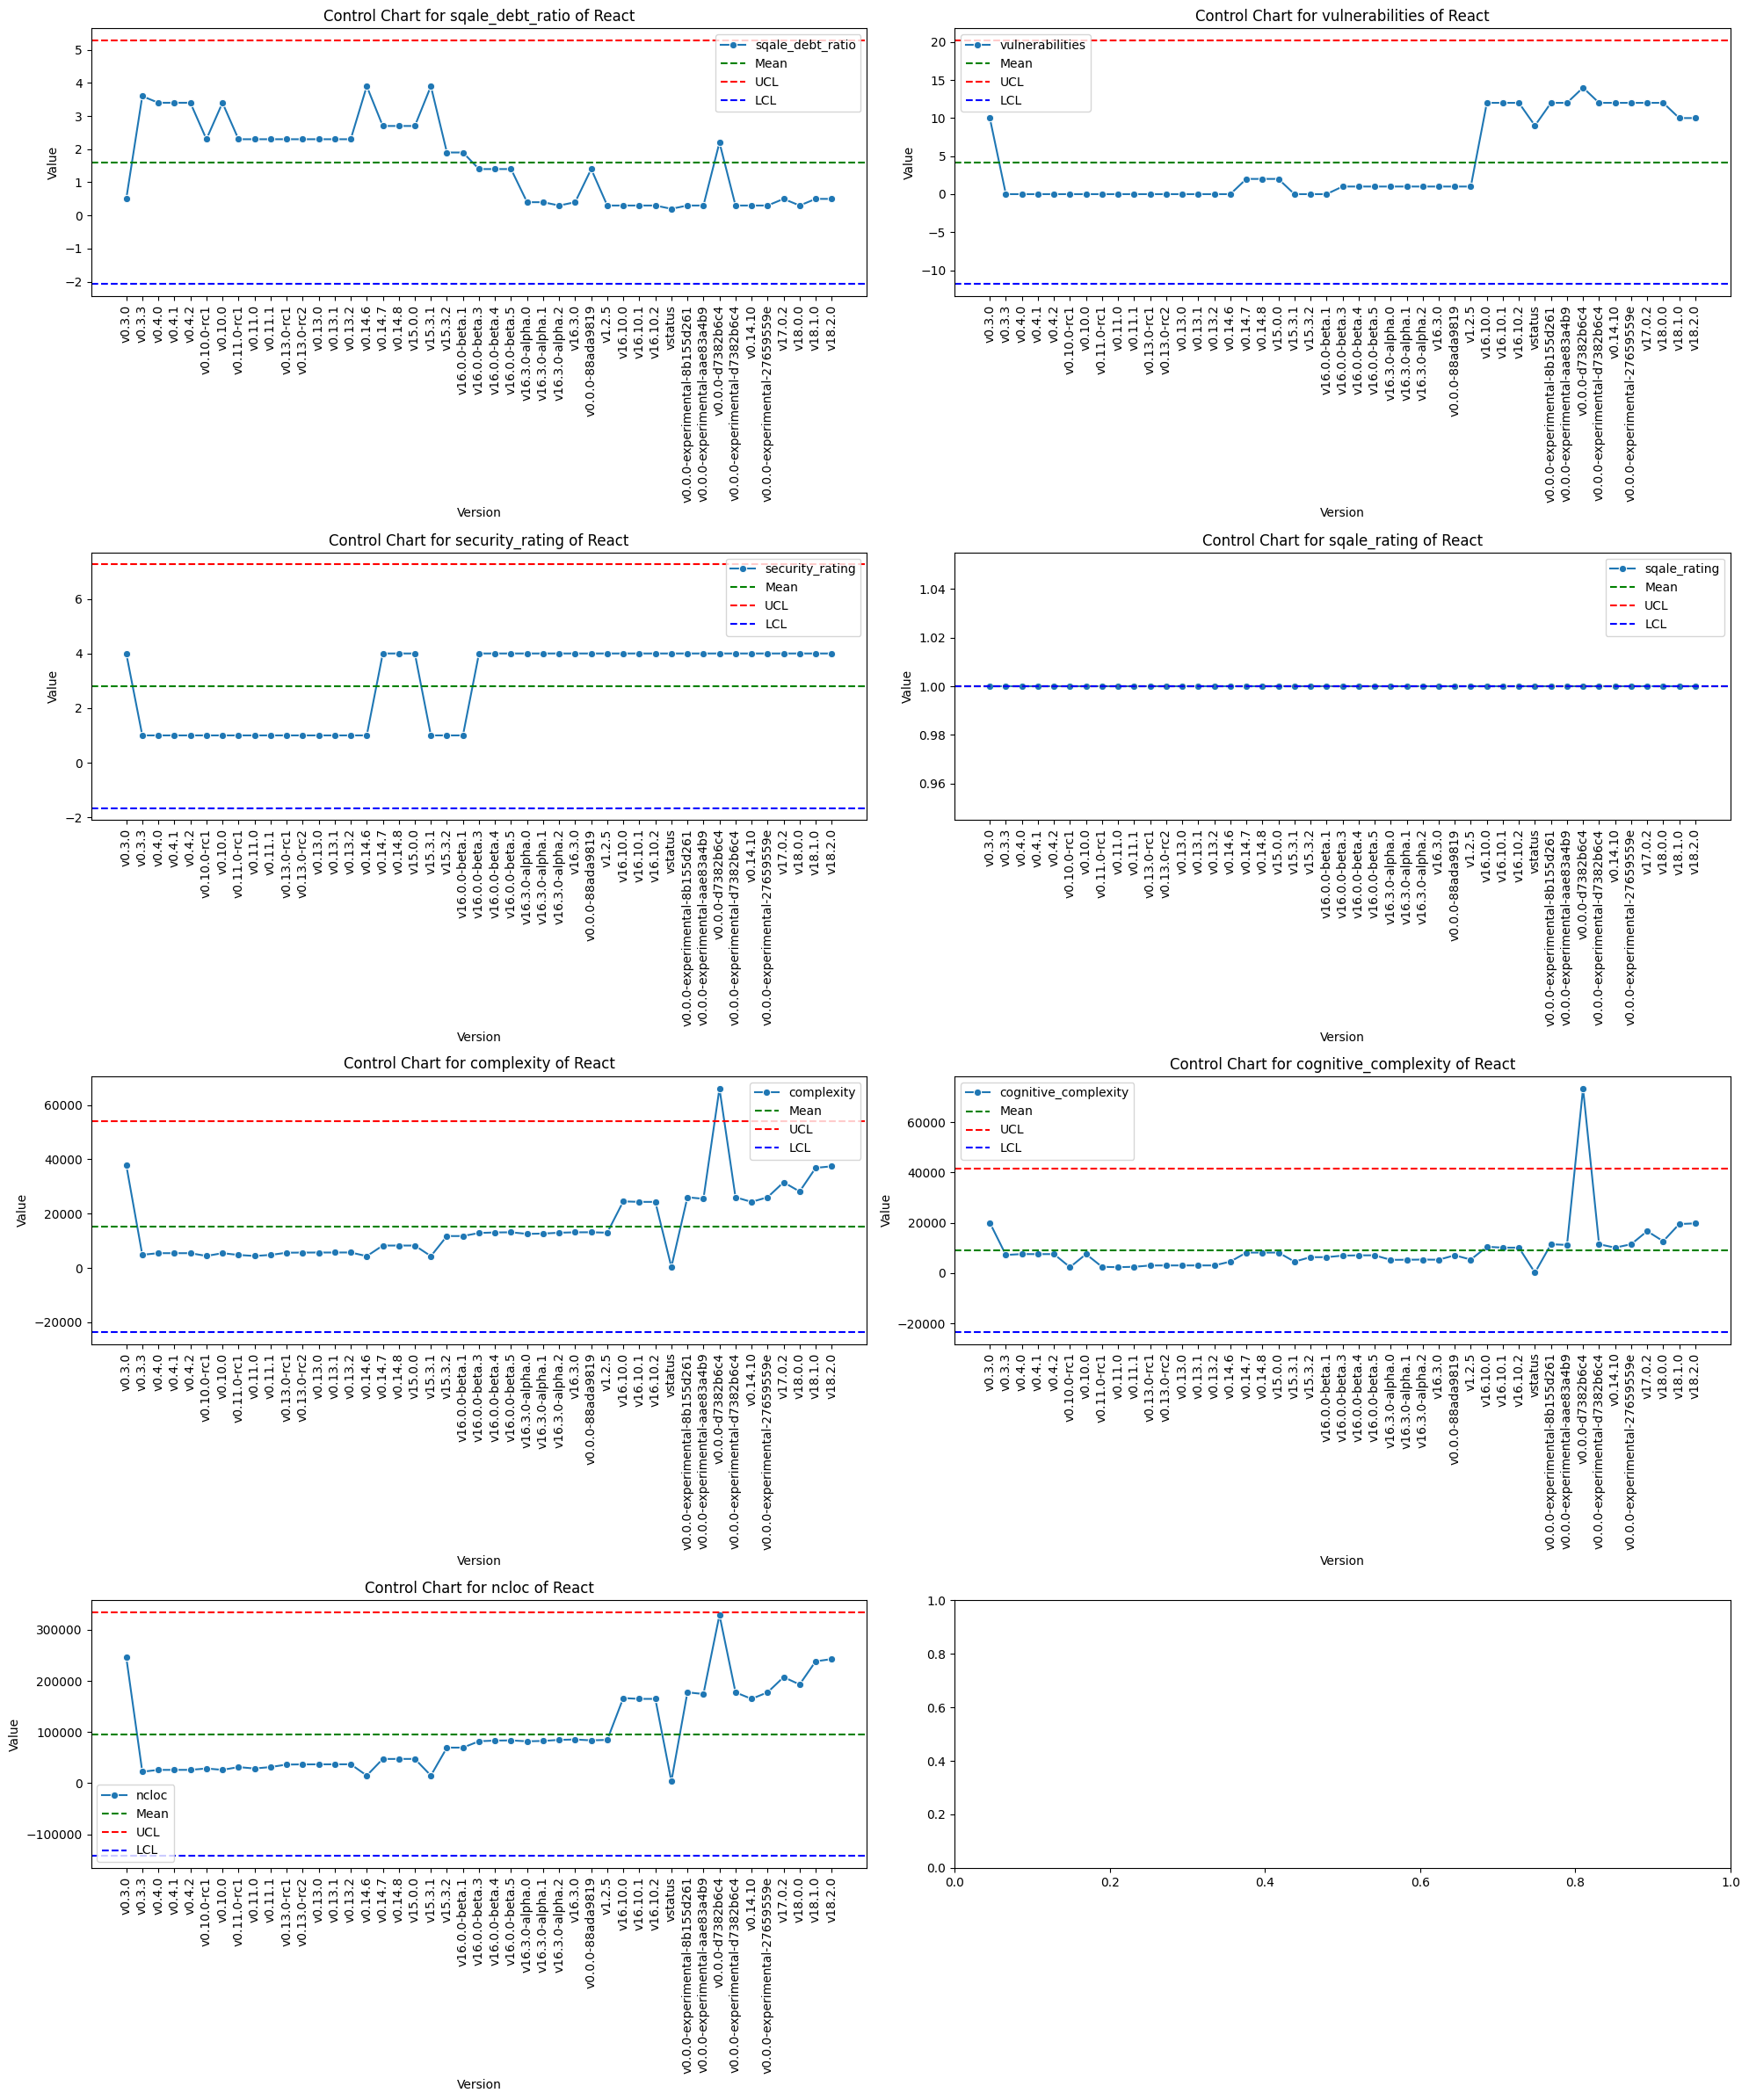

In [43]:
import numpy as np
import math

df['release_date'] = pd.to_datetime(df['release_date'])

# Sort DataFrame by 'release_date'
df = df.sort_values('release_date')

# Calculate the number of rows needed for the subplots
n = len(columns_for_controlChart)
ncols = 2
nrows = math.ceil(n / ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(20, 6*nrows))

# Flatten the axes array for easy iteration
axs = np.ravel(axs)

for i, col in enumerate(columns_for_controlChart):
    # Calculate mean and standard deviation
    mean = df[col].mean()
    std_dev = df[col].std()

    # Calculate control limits
    ucl = mean + 3*std_dev
    lcl = mean - 3*std_dev

    # Plot the data, mean, and control limits
    sns.lineplot(x=df['version'], y=df[col], label=col, marker='o', ax=axs[i])
    axs[i].axhline(mean, color='g', linestyle='--', label='Mean')
    axs[i].axhline(ucl, color='r', linestyle='--', label='UCL')
    axs[i].axhline(lcl, color='b', linestyle='--', label='LCL')

    axs[i].set_title(f'Control Chart for {col} of React')
    axs[i].set_ylabel('Value')
    axs[i].set_xlabel('Version')
    axs[i].legend()

    # Rotate x-axis labels by 90 degrees
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

### Visualizing every column using Pairplot

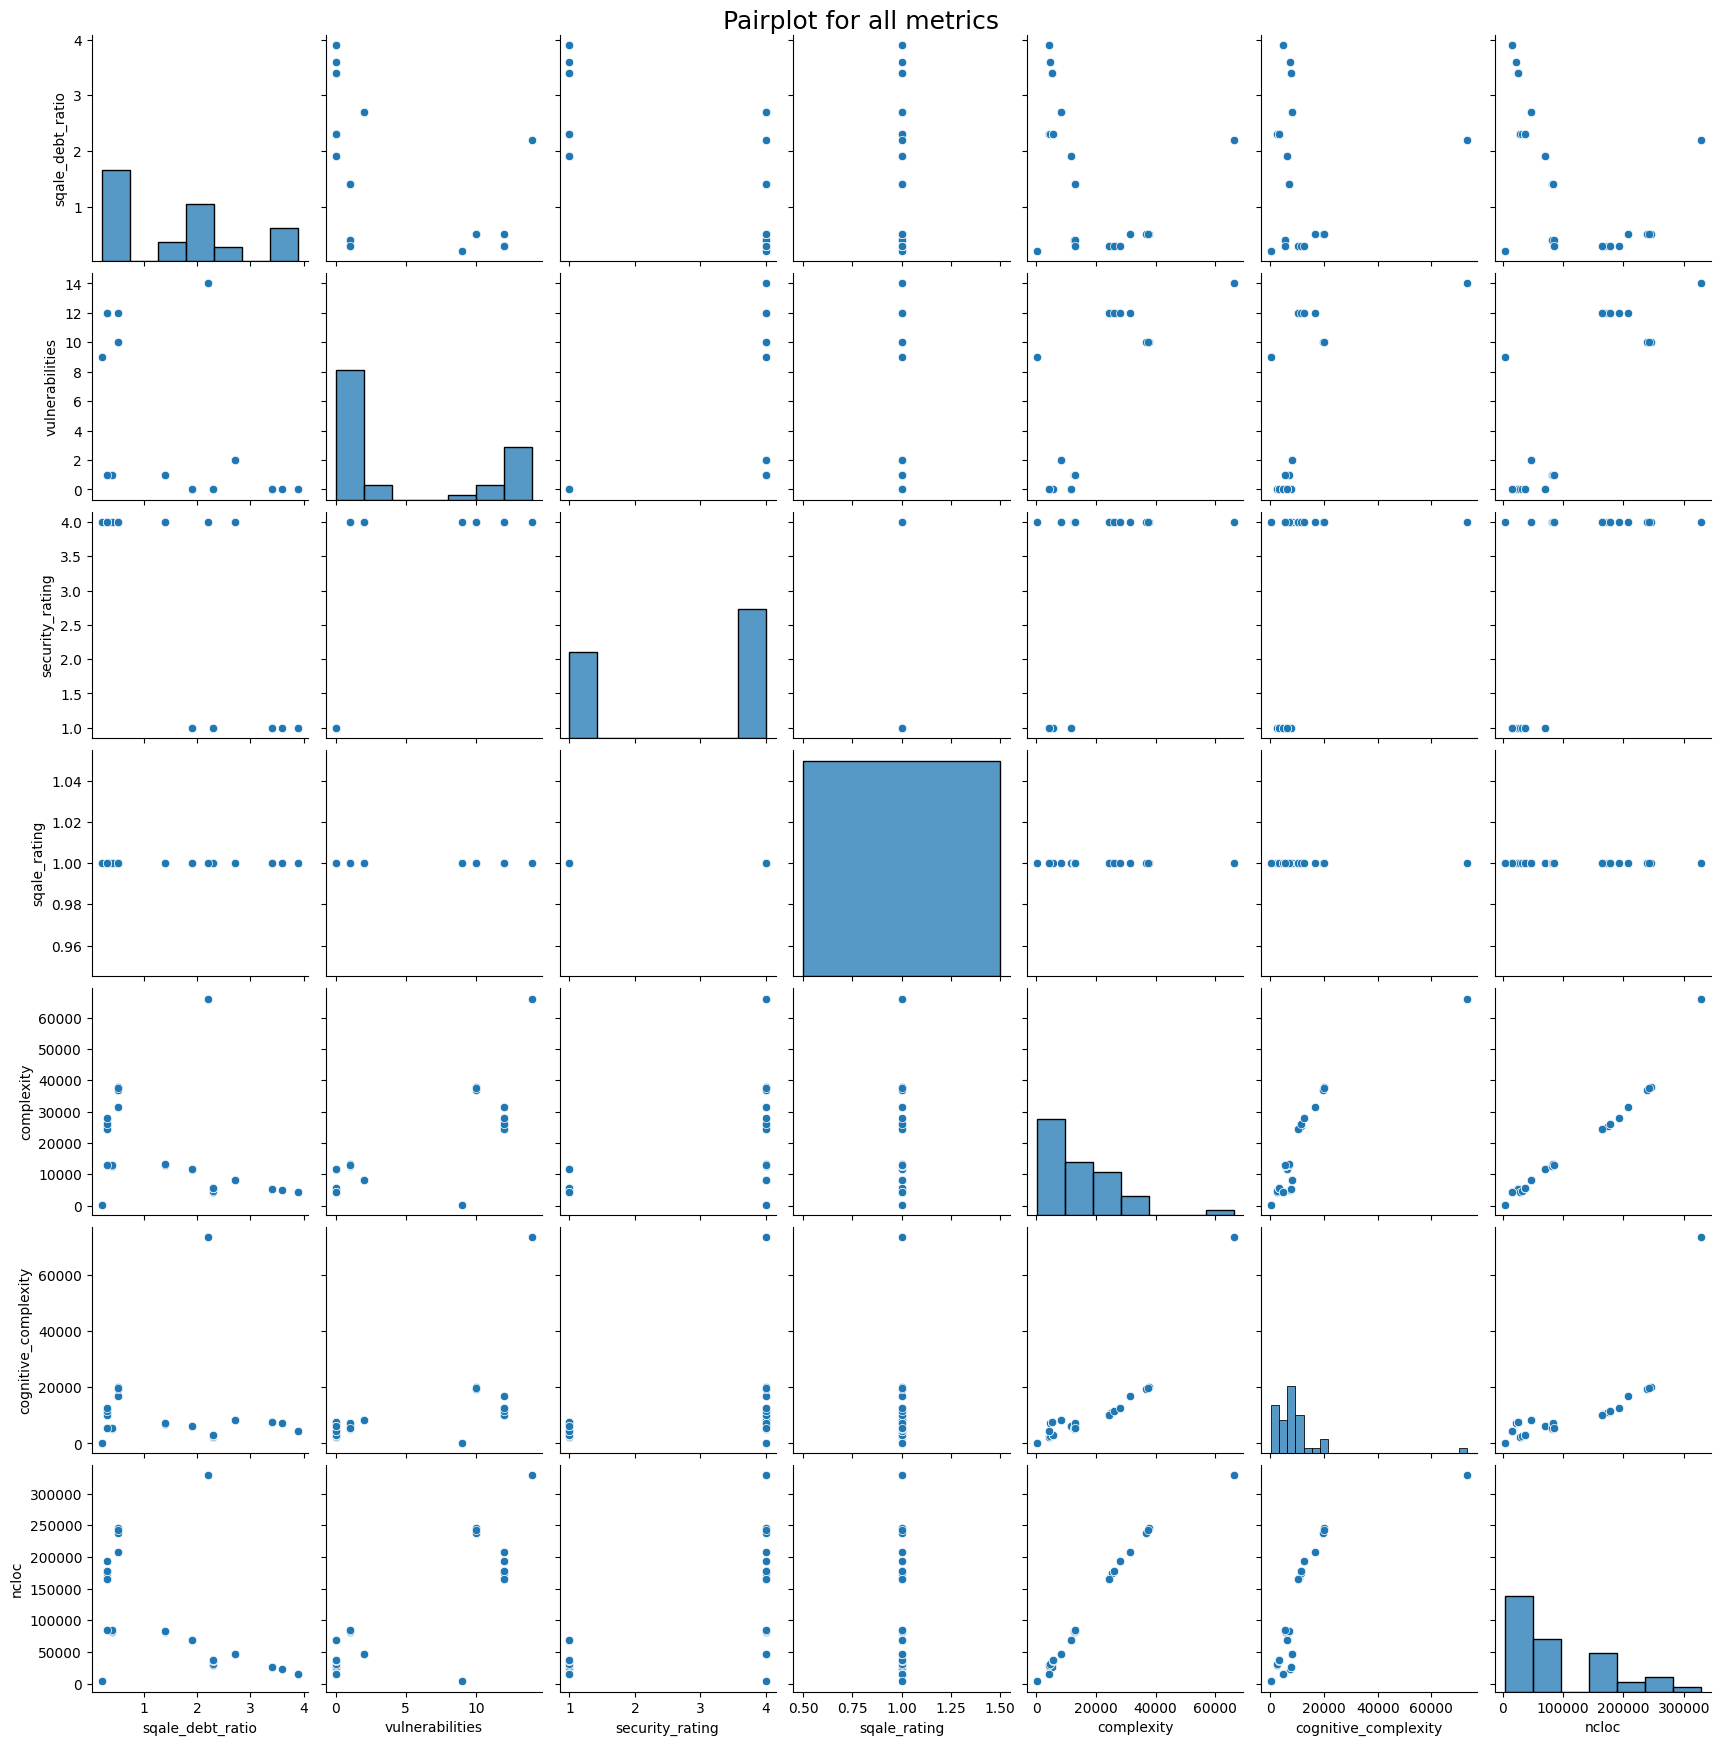

In [44]:
sns.pairplot(df[columns_for_controlChart])
plt.suptitle('Pairplot for all metrics', y=1., size=18)
plt.show()

### Visualization using Machine Learning Models

In [45]:
X = df[['ncloc']]
target_columns = ['complexity', 'cognitive_complexity', 'sqale_rating']

In [46]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42),
    'Support Vector': SVR(kernel='linear'),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

Linear Regression Model for complexity:
Mean Squared Error: 2659457.9182150746
R-squared: 0.9800023363904093

Decision Tree Model for complexity:
Mean Squared Error: 1348191.5555555555
R-squared: 0.9898623396051381

Random Forest Model for complexity:
Mean Squared Error: 1891912.7683777793
R-squared: 0.9857738545657827

Gradient Boosting Model for complexity:
Mean Squared Error: 1483857.1713575243
R-squared: 0.9888422086492715

Support Vector Model for complexity:
Mean Squared Error: 702049.7322151546
R-squared: 0.9947209714107962

MLP Regressor Model for complexity:
Mean Squared Error: 2735058.800370667
R-squared: 0.9794338592584415

Linear Regression Model for cognitive_complexity:
Mean Squared Error: 25405141.109568972
R-squared: 0.19927095331799127

Decision Tree Model for cognitive_complexity:
Mean Squared Error: 2409323.777777778
R-squared: 0.924062002906898

Random Forest Model for cognitive_complexity:
Mean Squared Error: 3269986.2906
R-squared: 0.896935309516972

Gradient Boos

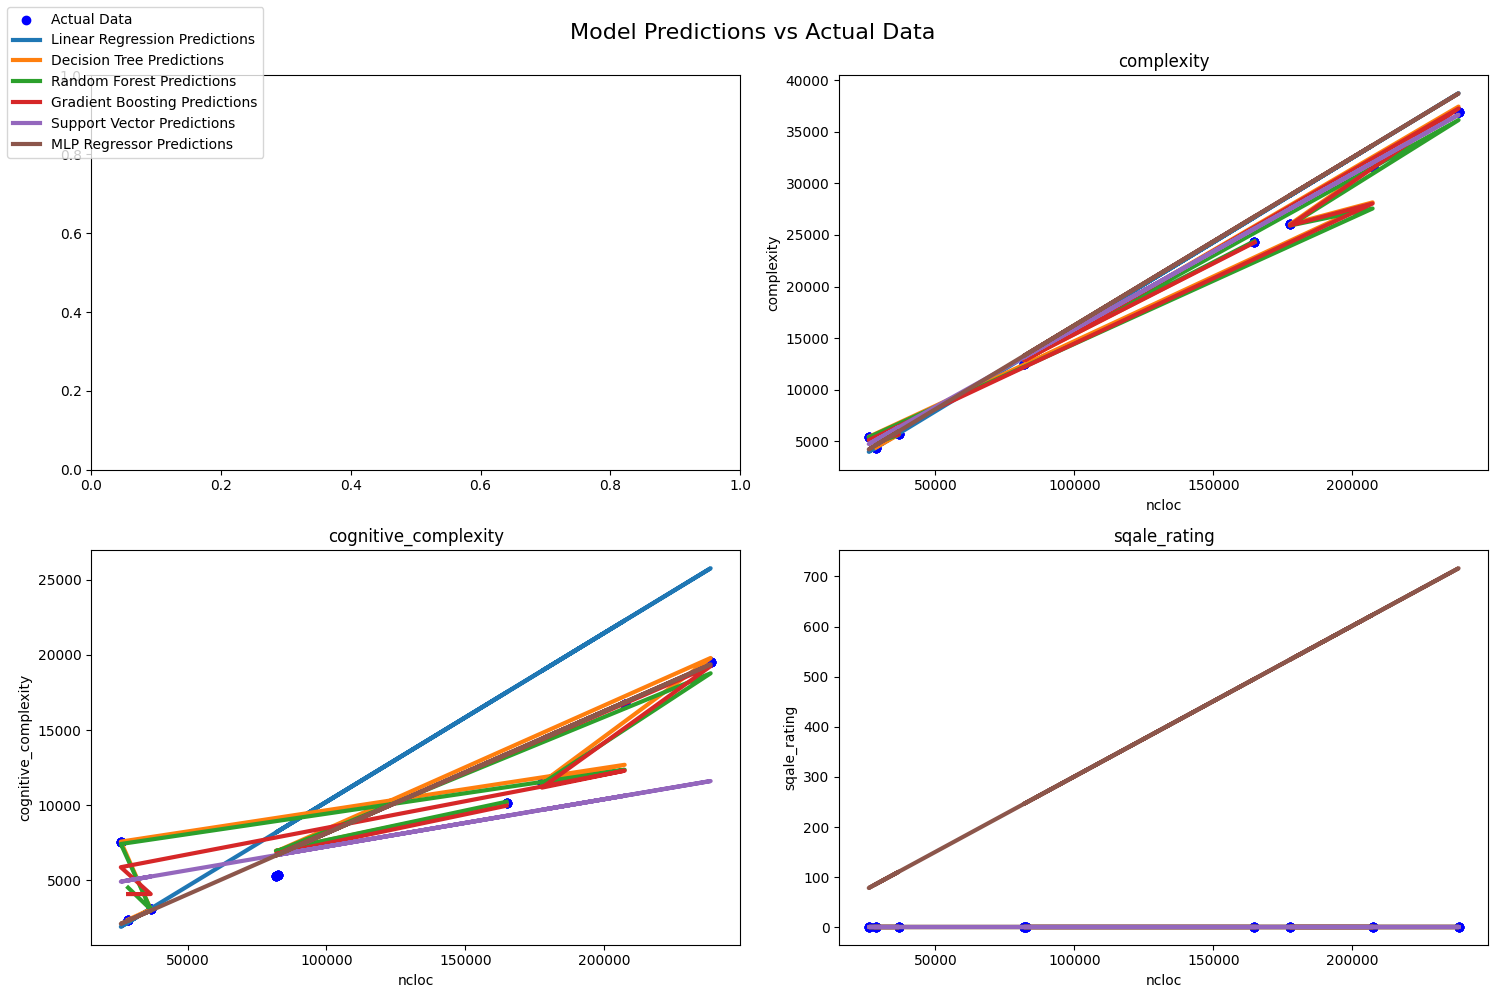

In [47]:
# Create a 2x2 grid for the plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Create a list to store handles for the legend
handles = []


# Loop over each target variable
for i, target in enumerate(target_columns):
    y = df[target]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Evaluate models
    results = {}
    for j, (name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        results[name] = {'MSE': mse, 'R-squared': r2}

        # Scatter plot of actual data points
        scatter = axs[(i+1)//2, (i+1)%2].scatter(X_test, y_test, color='blue')

        # Regression line
        line = axs[(i+1)//2, (i+1)%2].plot(X_test, predictions, linewidth=3)

        # Set general name for the subplot
        axs[(i+1)//2, (i+1)%2].set_title(target_columns[i])

        axs[(i+1)//2, (i+1)%2].set_xlabel('ncloc')
        axs[(i+1)//2, (i+1)%2].set_ylabel(target)

        # Store handles for the legend
        if i == 0 and j == 0:
            handles.append(scatter)
        if i == 0:
            handles.extend(line)

    # Display results
    for name, metrics in results.items():
        print(f"{name} Model for {target}:")
        print(f"Mean Squared Error: {metrics['MSE']}")
        print(f"R-squared: {metrics['R-squared']}")
        print()

# Create a single legend for all subplots
labels = ['Actual Data'] + [name + ' Predictions' for name in models.keys()]
fig.legend(handles, labels, loc='upper left')

# Set a general title for the figure
fig.suptitle('Model Predictions vs Actual Data', fontsize=16)

plt.tight_layout()
plt.show()

Ensemble Model for complexity:
Mean Squared Error: 442035.31508489506
R-squared: 0.9966761370901631

Ensemble Model for cognitive_complexity:
Mean Squared Error: 5586408.775117358
R-squared: 0.8239254112550125

Ensemble Model for sqale_rating:
Mean Squared Error: 0.0
R-squared: 1.0



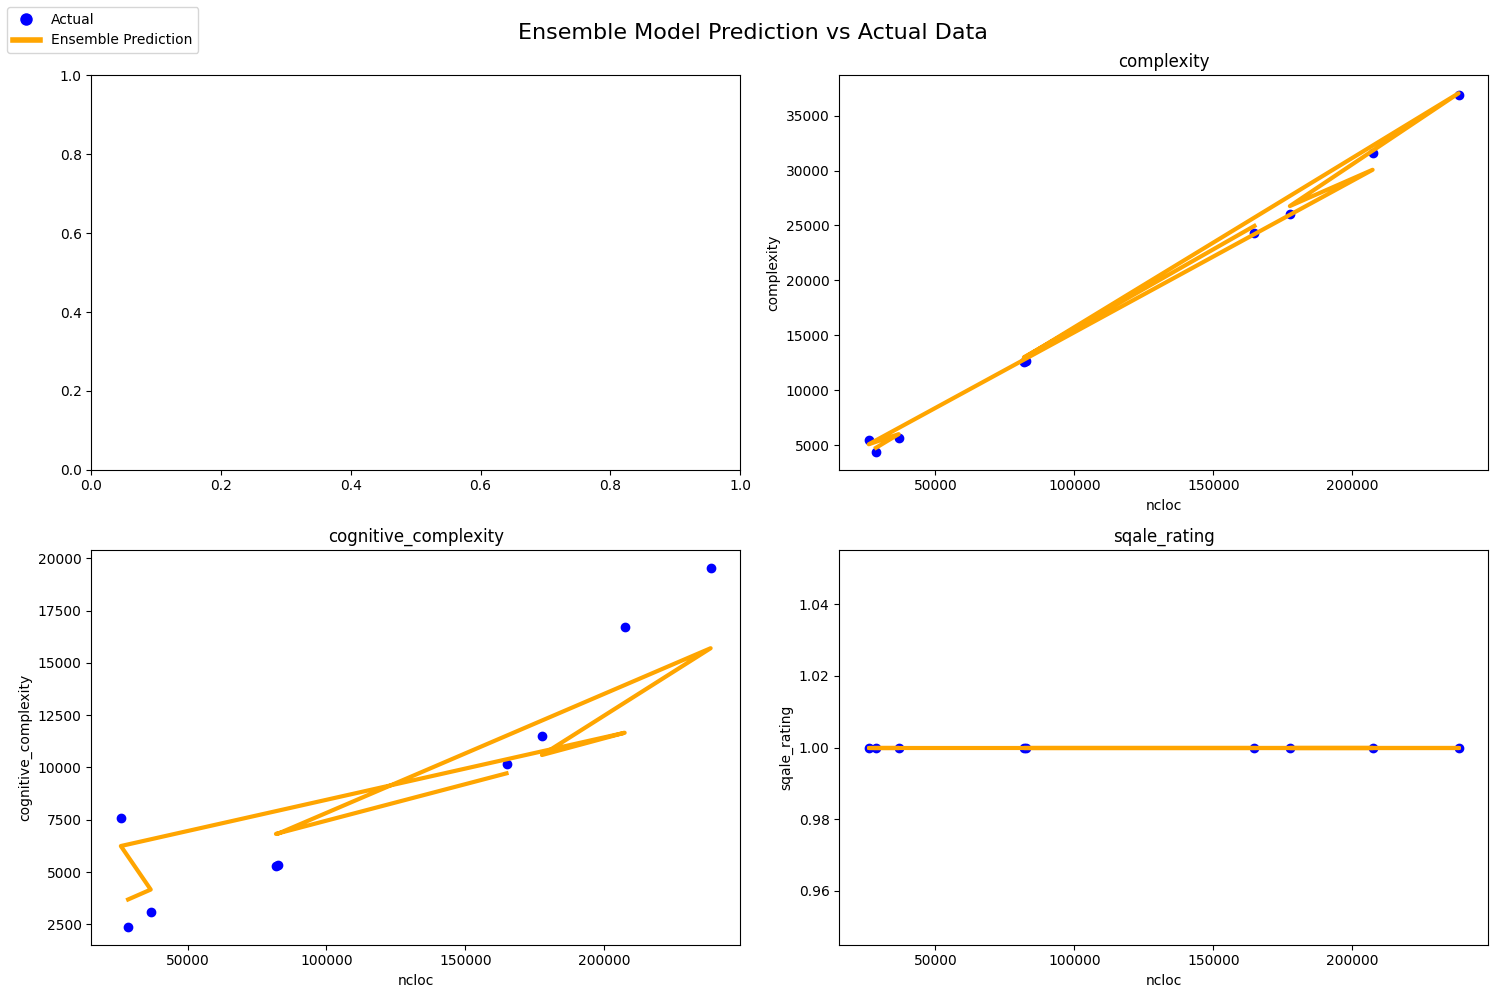

In [48]:
# Create a 2x2 grid for the plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Define the Ensemble model
models = {
    'Ensemble': VotingRegressor([('SVM', SVR(kernel='linear')), ('Decision Tree', DecisionTreeRegressor(random_state=42))])
}

# Create custom legend handles and labels
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Actual', markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], color='orange', lw=4, label='Ensemble Prediction')]

# Loop over each target variable
for i, target in enumerate(target_columns):
    y = df[target]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Evaluate the Ensemble model
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        results[name] = {'MSE': mse, 'R-squared': r2}

        # Scatter plot of actual data points
        scatter = axs[(i+1)//2, (i+1)%2].scatter(X_test, y_test, color='blue')

        # Regression line
        line = axs[(i+1)//2, (i+1)%2].plot(X_test, predictions, linewidth=3, color='orange')

        axs[(i+1)//2, (i+1)%2].set_title(f'{target}')
        axs[(i+1)//2, (i+1)%2].set_xlabel('ncloc')
        axs[(i+1)//2, (i+1)%2].set_ylabel(target)

    # Display results
    for name, metrics in results.items():
        print(f"{name} Model for {target}:")
        print(f"Mean Squared Error: {metrics['MSE']}")
        print(f"R-squared: {metrics['R-squared']}")
        print()

# Add the legend to the figure
fig.legend(handles=legend_elements, loc='upper left')

# Set a general title for the figure
fig.suptitle('Ensemble Model Prediction vs Actual Data', fontsize=16)

plt.tight_layout()
plt.show()